# **Классификация кредитных рейтингов**

## 0. Словесное описание задачи.





 На протяжении некоторого времени глобальная финансовая компания собирала основные банковские реквизиты своих клиентов. Накопив некоторое количество информации, компания смогла составить кредитные истории каждого клиента. Руководство компании хочет создать интеллектуальную систему для разделения людей по группам кредитных баллов, чтобы сократить ручные усилия сотрудников.

Необходимо произвести обработку данных в этой глобальной финансовой компании, определить, к какому классу (признак: Credit_Score) относится тот или иной клиент компании (Poor, Standard, Good).


## 1. Чтение данных.
Набор данных содержит обучающую и тестовую выборки.

In [6]:
# Массивы
import numpy as np

# Графическое отображение
import matplotlib.pyplot as plt
import seaborn as sns

# Таблицы и временные ряды
import pandas as pd

# Математические функции
from cmath import nan

# Разделение на выборки
from sklearn.model_selection import train_test_split

# Решение задачи классификации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.classifier import confusion_matrix, class_prediction_error

Рассмотрим данные обучающей выборки и проанализируем имеющиеся признаки.

In [7]:
credit_data = pd.read_csv('/data/train.csv')

<ipython-input-7-7cd65816890a>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_data = pd.read_csv('/data/train.csv')


In [8]:
credit_data.shape

(100000, 28)

Количество строк - число клиентов компании 100000, количество столбцов-признаков 28.

Составим таблицу представления признаков.


In [9]:
credit_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Объем данных N = 100000, количество признаков d = 28, а число классов K = 3.

Рассмотрим признаки.

In [10]:
credit_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Опишем наши признаки:


> 1.   ID - идентификатор записи в данных (номер той или иной транзакции);
2. Customer_ID - идентификатор самого клиента в базе данных;
2.   Month - месяц записи о клиенте;
3. Name - имя клиента;
4. Age - возраст клиента;
5. SSN - номер социального страхования человека ;
6. Occupation - вид занятости;
7. Annual_Income - годовой доход человека;
8. Monthly_Inhand_Salary - заработная плата клиента в месяц;
9. Num_Bank_Accounts - количество банковских счетов, которыми владеет клиент;
10. Num_Credit_Card - количество других кредитных карт у клиента;
11. Interest_Rate - процентная ставка по кредитной карте;
12. Num_of_Loan - количество кредитов, взятых в банке клиентом;
13. Type_of_Loan - виды займов, взятых клиентом в банке;
14. Delay_from_due_date - среднее количество дней задержки с даты платежа;
15. Num_of_Delayed_Payment - среднее количество платежей, задержанных клиентом;
16. Changed_Credit_Limit - процентное изминение лимита кредитной карты;
17. Num_Credit_Inquiries - количество запросов по кредитной карте клиентом;
18. Credit_Mix - классификация сочетания кредитов;
19. Outstanding_Debt - оставшийся долг, подлежащий выплате;
20. Credit_Utilization_Ratio - коэффициент использования кредитной карты;
21. Credit_History_Age - возраст кредитной истории;
22. Payment_of_Min_Amount - была ли выплача лицом только минимальная сумма;
23. Total_EMI_per_month - ежемесячные платежи EMI;
27. Amount_invested_monthly - ежемесячая сумма, инвестированная клиентом;
24. Payment_Behaviour - платежное поведие клиента;
25. Monthly_Balance - ежемесячная сумма баланса клиента;
26. Credit_Score - кредитный рейтинг.

Выведем тип данных каждого признака:

In [11]:
credit_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Видим, что некоторые признаки имеют тип данных "Object". Обработаем их, преобразовав тип к необходимому для обработки категориальных значений.


Переведем признаки "ID" и "Customer_ID" в числовые типы.

In [12]:
credit_data['ID'] = credit_data.ID.apply(lambda x: int(x, 16))
credit_data['Customer_ID'] = credit_data.Customer_ID.apply(lambda x: int(x[4:], 16))

Обработаем признаки "Month" и "Name".

In [13]:
credit_data["Month"] = credit_data["Month"].astype("category")
credit_data["Name"] = credit_data["Name"].astype("category")

Посмотрим на результат обработки.


In [14]:
credit_data["Month"], credit_data["Name"]

(0         January
 1        February
 2           March
 3           April
 4             May
            ...   
 99995       April
 99996         May
 99997        June
 99998        July
 99999      August
 Name: Month, Length: 100000, dtype: category
 Categories (8, object): ['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May'],
 0        Aaron Maashoh
 1        Aaron Maashoh
 2        Aaron Maashoh
 3        Aaron Maashoh
 4        Aaron Maashoh
              ...      
 99995            Nicks
 99996            Nicks
 99997            Nicks
 99998            Nicks
 99999            Nicks
 Name: Name, Length: 100000, dtype: category
 Categories (10139, object): [' Mattr', ' Mattx', ' Stevei', ' Stevep', ..., 'ty', 'yi', 'yk', 'yv'])

Признак "Age" для некоторых значений выходит за пределы допустимого возраста, а также заканчивается на нижнее подчеркивание. Устраним данные проблемы.

In [15]:
# Нижнее подчеркивание
def Age_underscore(row):
    lenStr = len(row.Age)
    if((issubclass(type(row.Age), str)) and (row.Age[lenStr-1] == '_')):
        age = int(row.Age[:lenStr-1])
        return age
    else:
        age = int(row.Age[:lenStr])
        return age

credit_data['Age'] = credit_data.apply(Age_underscore,axis=1)
credit_data['Age']

0         23
1         23
2       -500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

In [16]:
# Выход за пределы
def Age_lim(row):
    if((row.Age >100) or (row.Age < 0)):
        return None
    else:
        return row.Age

credit_data['Age'] = credit_data.apply(Age_lim,axis=1)
credit_data['Age']

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

Переведем признаки "SNN" и "Occupation" в категориальный тип и исключим недопустимые значения:

In [17]:
# Признак "SNN"
def SSN(row):
    if(row.SSN == '#F%$D@*&8'):
        return None
    else:
        return row.SSN

# Признак "Occupation"
def Occupation_(row):
    if(row.Occupation == '_______'):
        return None
    else:
        return row.Occupation

credit_data['SSN']=credit_data.apply(SSN,axis=1)
credit_data["SSN"] = credit_data["SSN"].astype("category")
credit_data["Occupation"]=credit_data.apply(Occupation_,axis=1)
credit_data["Occupation"] = credit_data["Occupation"].astype("category")

credit_data["SSN"], credit_data["Occupation"]

(0        821-00-0265
 1        821-00-0265
 2        821-00-0265
 3        821-00-0265
 4        821-00-0265
             ...     
 99995    078-73-5990
 99996    078-73-5990
 99997    078-73-5990
 99998    078-73-5990
 99999    078-73-5990
 Name: SSN, Length: 100000, dtype: category
 Categories (12500, object): ['000-08-1349', '000-40-3312', '000-58-0568', '000-60-0688', ...,
                              '999-84-9578', '999-92-7186', '999-95-7259', '999-99-3421'],
 0        Scientist
 1        Scientist
 2        Scientist
 3        Scientist
 4        Scientist
            ...    
 99995     Mechanic
 99996     Mechanic
 99997     Mechanic
 99998     Mechanic
 99999     Mechanic
 Name: Occupation, Length: 100000, dtype: category
 Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician',
                           'Scientist', 'Teacher', 'Writer'])

Обработаем данные признака "Annual_Income", исключив подчеркивания:

In [18]:
def Annual_income_underscore(row):
    x = len(row.Annual_Income)
    if((issubclass(type(row.Annual_Income), str)) and (row.Annual_Income[x-1] == '_')):
        ai = row.Annual_Income[:x-1]
        return ai
    elif(issubclass(type(row.Annual_Income), str)):
        ai = row.Annual_Income[:x]
        return ai
    else:
        ai = row.Annual_Income
        return ai

credit_data["Annual_Income"] = credit_data.apply(Annual_income_underscore,axis=1)
credit_data["Annual_Income"] = credit_data["Annual_Income"].astype(float)
credit_data["Annual_Income"]

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

Признаки "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate" должны иметь положительные значения.

In [19]:
# Признак "Num_Bank_Accounts"
def Num_Bank_Accounts_plus(row):
    if(row.Num_Bank_Accounts < 0 ):
        return None
    else:
        return row.Num_Bank_Accounts

# Признак "Num_Credit_Card"
def Num_Credit_Card_plus(row):
    if(row.Num_Credit_Card < 0 ):
        return None
    else:
        return row.Num_Credit_Card

# Признак "Interest_Rate"
def Interest_Rate_plus(row):
    if((row.Interest_Rate < 0) or (row.Interest_Rate > 100 )):
        return None
    else:
        return row.Interest_Rate

credit_data["Num_Bank_Accounts"]=credit_data.apply(Num_Bank_Accounts_plus,axis=1)
credit_data["Num_Credit_Card"]=credit_data.apply(Num_Credit_Card_plus,axis=1)
credit_data["Interest_Rate"]=credit_data.apply(Interest_Rate_plus,axis=1)

credit_data["Num_Bank_Accounts"], credit_data["Num_Credit_Card"], credit_data["Interest_Rate"]

(0        3.0
 1        3.0
 2        3.0
 3        3.0
 4        3.0
         ... 
 99995    4.0
 99996    4.0
 99997    4.0
 99998    4.0
 99999    4.0
 Name: Num_Bank_Accounts, Length: 100000, dtype: float64,
 0        4
 1        4
 2        4
 3        4
 4        4
         ..
 99995    6
 99996    6
 99997    6
 99998    6
 99999    6
 Name: Num_Credit_Card, Length: 100000, dtype: int64,
 0        3.0
 1        3.0
 2        3.0
 3        3.0
 4        3.0
         ... 
 99995    7.0
 99996    7.0
 99997    NaN
 99998    7.0
 99999    7.0
 Name: Interest_Rate, Length: 100000, dtype: float64)

В признаке "Num_of_Loan" нужно убрать нижние подчеркивания и проверить его на допустимые значения.

In [20]:
def Num_of_Loan_underscore(row):
    x = len(row.Num_of_Loan)
    if((issubclass(type(row.Num_of_Loan), str)) and (row.Num_of_Loan[x-1] == '_')):
        nol = int(row.Num_of_Loan[:x-1])
        return nol
    else:
        nol = int(row.Num_of_Loan[:x])
        return nol

def NOL(row):
    if(row.Num_of_Loan < 0 ):
        return None
    else:
        return row.Num_of_Loan

credit_data['Num_of_Loan'] = credit_data.apply(Num_of_Loan_underscore,axis=1)
credit_data["Num_of_Loan"]=credit_data.apply(NOL,axis=1)
credit_data["Num_of_Loan"]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    2.0
99996    2.0
99997    2.0
99998    2.0
99999    2.0
Name: Num_of_Loan, Length: 100000, dtype: float64

Переведем "Type_Of_Loan" к нужному типу.

In [21]:
credit_data['Type_of_Loan'].replace([np.NaN], None, inplace=True)
credit_data["Type_of_Loan"]=credit_data["Type_of_Loan"].astype("category")
credit_data["Type_of_Loan"]

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: category
Categories (6260, object): ['Auto Loan', 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, C...,
                            'Auto Loan, Auto Loan, Auto Loan, Auto Loan, S..., 'Auto Loan, Auto Loan, Auto Loan, Credit-Build...,
                            ..., 'Student Loan, and Not Specified',
         

Проверим значения признака "Delay_from_due_date". Они должны быть положительными.

In [22]:
def Delay_from_due_date_plus(row):
    if(row.Delay_from_due_date < 0 ):
        return None
    else:
        return row.Delay_from_due_date

credit_data["Delay_from_due_date"]=credit_data.apply(Delay_from_due_date_plus,axis=1)
credit_data["Delay_from_due_date"]

0         3.0
1         NaN
2         3.0
3         5.0
4         6.0
         ... 
99995    23.0
99996    18.0
99997    27.0
99998    20.0
99999    18.0
Name: Delay_from_due_date, Length: 100000, dtype: float64

Признаки "Num_of_Delayed_Payment" и "Changed_Credit_Limit" переведем в числовые типы.

In [23]:
def Num_of_Delayed_Payment_(row):
    if (issubclass(type(row.Num_of_Delayed_Payment), str)):
        x = len(row.Num_of_Delayed_Payment)
        if (row.Num_of_Delayed_Payment[x-1] == '_'):
            nodp = int(row.Num_of_Delayed_Payment[:x-1])
            return nodp
        else:
            nodp = int(row.Num_of_Delayed_Payment[:x])
            return nodp
    else:
        return row.Num_of_Delayed_Payment

def Changed_Credit_Limit(row):
    if(row.Changed_Credit_Limit == '_'):
        return None
    else:
        return row.Changed_Credit_Limit

credit_data["Changed_Credit_Limit"]=credit_data.apply(Changed_Credit_Limit,axis=1)
credit_data["Changed_Credit_Limit"]=credit_data["Changed_Credit_Limit"].astype(float)
credit_data["Num_of_Delayed_Payment"]=credit_data.apply(Num_of_Delayed_Payment_,axis=1)

credit_data["Changed_Credit_Limit"], credit_data["Num_of_Delayed_Payment"]

(0        11.27
 1        11.27
 2          NaN
 3         6.27
 4        11.27
          ...  
 99995    11.50
 99996    11.50
 99997    11.50
 99998    11.50
 99999    11.50
 Name: Changed_Credit_Limit, Length: 100000, dtype: float64,
 0        7.0
 1        NaN
 2        7.0
 3        4.0
 4        NaN
         ... 
 99995    7.0
 99996    7.0
 99997    6.0
 99998    NaN
 99999    6.0
 Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64)

У признаков "Changed_Credit_Limit", "Credit_Mix" и "Outstanding_Debt" обработаем нижнее подчеркивание.

In [24]:
def Changed_Credit_Limit_underscore(row):
    if(row.Changed_Credit_Limit == '_'):
        return None
    else:
        return row.Changed_Credit_Limit
def Credit_Mix_underscore(row):
    if(row.Credit_Mix == '_'):
        return None
    else:
        return row.Credit_Mix

def Outstanding_Debt_underscore(row):
    if(type(row.Outstanding_Debt) == str):
        x = len(row.Outstanding_Debt)
        if(row.Outstanding_Debt[x-1] == '_'):
            odebt = row.Outstanding_Debt[:x-1]
            return odebt
        else:
            odebt = row.Outstanding_Debt[:x]
            return odebt
    else:
        return row.Outstanding_Debt



credit_data["Changed_Credit_Limit"]=credit_data.apply(Changed_Credit_Limit_underscore,axis=1)
credit_data["Changed_Credit_Limit"]=credit_data["Changed_Credit_Limit"].astype(float)
credit_data["Credit_Mix"] = credit_data.apply(Credit_Mix_underscore,axis=1)
credit_data["Credit_Mix"] = credit_data["Credit_Mix"].astype("category")
credit_data["Outstanding_Debt"] = credit_data.apply(Outstanding_Debt_underscore,axis=1)
credit_data["Outstanding_Debt"] = credit_data["Outstanding_Debt"].astype(float)

credit_data["Changed_Credit_Limit"], credit_data["Credit_Mix"], credit_data["Outstanding_Debt"]

(0        11.27
 1        11.27
 2          NaN
 3         6.27
 4        11.27
          ...  
 99995    11.50
 99996    11.50
 99997    11.50
 99998    11.50
 99999    11.50
 Name: Changed_Credit_Limit, Length: 100000, dtype: float64,
 0         NaN
 1        Good
 2        Good
 3        Good
 4        Good
          ... 
 99995     NaN
 99996     NaN
 99997    Good
 99998    Good
 99999    Good
 Name: Credit_Mix, Length: 100000, dtype: category
 Categories (3, object): ['Bad', 'Good', 'Standard'],
 0        809.98
 1        809.98
 2        809.98
 3        809.98
 4        809.98
           ...  
 99995    502.38
 99996    502.38
 99997    502.38
 99998    502.38
 99999    502.38
 Name: Outstanding_Debt, Length: 100000, dtype: float64)

Таким образом, мы получили два числовых признака и один категориальный.

Переведем признак "Credit_History_Age" в числовой.

In [25]:
def Credit_History_Age_(x):
    if(type(x.Credit_History_Age) != float):
        if (x.Credit_History_Age != None):
            z = x.Credit_History_Age.split(' ')
            num1 = int(z[0])
            num2 = int(z[3])
            return (num1*12)+num2
        else:
            return x.Credit_History_Age
    else:
        return x.Credit_History_Age

credit_data["Credit_History_Age"] = credit_data.apply(Credit_History_Age_,axis=1)
credit_data["Credit_History_Age"]

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

Признак "Payment_of_Min_Amount" преобразуем в бинарный.

In [26]:
if type(credit_data["Payment_of_Min_Amount"].iloc[0]) == str:
    credit_data["Payment_of_Min_Amount"] = credit_data["Payment_of_Min_Amount"].apply(lambda x: 1 if x == "Yes" else (0 if x == "No" else None))

credit_data["Payment_of_Min_Amount"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: Payment_of_Min_Amount, Length: 100000, dtype: float64

Исключим недопустимые значения у признаков "Amount_invested_monthly","Payment_Behaviour" и "Monthly_Balance".

In [27]:
def Amount_invested_monthly_(row):
    if(row.Amount_invested_monthly == '__10000__'):
        return None
    else:
        return row.Amount_invested_monthly

def Payment_Behaviour_(row):
    if(row.Payment_Behaviour == '!@9#%8'):
        return None
    else:
        return row.Payment_Behaviour

def Monthly_Balance_(row):
    if(row.Monthly_Balance == '__-333333333333333333333333333__'):
        return None
    else:
        return row.Monthly_Balance

credit_data["Payment_Behaviour"] = credit_data.apply(Payment_Behaviour_,axis=1)
credit_data["Payment_Behaviour"] = credit_data["Payment_Behaviour"].astype("category")
credit_data["Amount_invested_monthly"] = credit_data.apply(Amount_invested_monthly_,axis=1)
credit_data["Amount_invested_monthly"] = credit_data["Amount_invested_monthly"].astype(float)
credit_data["Monthly_Balance"] = credit_data.apply(Monthly_Balance_,axis=1)
credit_data["Monthly_Balance"] = credit_data["Monthly_Balance"].astype(float)

credit_data["Payment_Behaviour"], credit_data["Amount_invested_monthly"], credit_data["Monthly_Balance"]

(0         High_spent_Small_value_payments
 1          Low_spent_Large_value_payments
 2         Low_spent_Medium_value_payments
 3          Low_spent_Small_value_payments
 4        High_spent_Medium_value_payments
                        ...               
 99995     High_spent_Large_value_payments
 99996    High_spent_Medium_value_payments
 99997     High_spent_Large_value_payments
 99998      Low_spent_Large_value_payments
 99999                                 NaN
 Name: Payment_Behaviour, Length: 100000, dtype: category
 Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
                          'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
                          'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments'],
 0         80.415295
 1        118.280222
 2         81.699521
 3        199.458074
 4         41.420153
             ...    
 99995     60.971333
 99996     54.185950
 99997     24

Признак, к которому мы будем применять задачу классификации, переведем в категориальный.

In [28]:
def Credit_Score_to_cat(row):
    if(row.Credit_Score == 'Poor'):
        return 0
    elif(row.Credit_Score == 'Standard'):
        return 1
    else:
        return 2

credit_data.Credit_Score = credit_data.apply(Credit_Score_to_cat,axis=1)
credit_data["Credit_Score"]

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

Получается, теперь все категориальные признаки имеют нужный вид.

In [29]:
credit_data.dtypes

ID                             int64
Customer_ID                    int64
Month                       category
Name                        category
Age                          float64
SSN                         category
Occupation                  category
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                category
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age           float64
Payment_of_Min_Amount        float64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour           category
Monthly_Balance              float64
C

## 2. Визуализация данных и вычисление основных характеристик.
Выведем сводную информацию о числовых признаках.

In [30]:
credit_data.describe()

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,97224.000000,1.000000e+05,84998.000000,99979.000000,100000.00000,97988.000000,96124.000000,99409.000000,...,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,87993.000000,100000.000000,91216.000000,98791.000000,100000.00000
mean,80631.500000,25982.666640,33.323274,1.764157e+05,4194.170850,17.095080,22.47443,14.546679,7.163622,21.207245,...,10.389025,27.754251,1426.220376,32.285173,221.195405,0.594661,1403.118217,195.539456,402.551258,0.88830
std,43301.486619,14340.543051,10.778909,1.429618e+06,3183.686167,117.416871,129.05741,8.798523,60.314923,14.794693,...,6.789496,193.177339,1155.129026,5.116875,99.741364,0.490960,8306.041270,199.564527,213.925499,0.67512
min,5634.000000,1006.000000,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,...,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.007760,0.00000
25%,43132.750000,13664.500000,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,7.000000,2.000000,10.000000,...,5.320000,3.000000,566.072500,28.052567,144.000000,0.000000,30.306660,72.236692,270.106630,0.00000
50%,80631.500000,25777.000000,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,...,9.400000,6.000000,1166.155000,32.305784,219.000000,1.000000,69.249473,128.954538,336.731225,1.00000
75%,118130.250000,38385.000000,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,...,14.870000,9.000000,1945.962500,36.496663,302.000000,1.000000,161.224249,236.815814,470.262938,1.00000
max,155629.000000,50999.000000,100.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,100.000000,1496.000000,67.000000,...,36.970000,2597.000000,4998.070000,50.000000,404.000000,1.000000,82331.000000,1977.326102,1602.040519,2.00000


В описании можно увидеть:

1. count - количество значений для каждого признака.
2. mean - среднее значение
3. std - стандартное отклонение
4. min/max - минимальное / максимальное значение
5. 25% - первый квартиль
6. 50% - медиана
7. 75% - третий квартиль

Рассмотрим категориальные признаки.




In [31]:
credit_data.describe(include=['category'])

,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_Behaviour
count,100000,90015,94428,92938,88592,79805,92400
unique,8,10139,12500,15,6260,3,6
top,April,Langep,000-08-1349,Lawyer,Not Specified,Standard,Low_spent_Small_value_payments
freq,12500,44,8,6575,1408,36479,25513


Для категориальных признаков мы получили:

1. count - количество значений.
2. unique - количество уникальных значений.
3. top - наиболее встречающееся значение.
4. freq - частота наиболее встречающегося значения.

Некоторые выводы:
*   средний возраст клиента 33 года;
*   ежемесячная зарплата варьируется от 300 долларов до 15000;
* большая часть клиентов имеет долг;
* большая часть клиентов имеет статус "Стандарт";


Проверим наличие выбросов в признаках, найдем квартили для признаков.


In [32]:
credit_data["Num_Bank_Accounts"].quantile([.01,.05,.1,.5, .8, .9,.95, .985, .99,.995])

0.010       0.00
0.050       1.00
0.100       2.00
0.500       6.00
0.800       8.00
0.900       9.00
0.950      10.00
0.985      10.00
0.990     445.22
0.995    1096.00
Name: Num_Bank_Accounts, dtype: float64

95% пользователей имеют от 0-10 аккаунтов в банках.

In [33]:
credit_data["Num_Credit_Card"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .97, .99,.995])

0.005       1.0
0.010       1.0
0.050       3.0
0.100       3.0
0.500       5.0
0.800       7.0
0.900       9.0
0.950      10.0
0.970      10.0
0.990     849.0
0.995    1177.0
Name: Num_Credit_Card, dtype: float64

95% пользователей имеют от 1 до 10 кредиток в банках.

In [34]:
credit_data["Num_of_Loan"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050       0.0
0.0100       0.0
0.0500       0.0
0.1000       0.0
0.5000       3.0
0.8000       6.0
0.9000       7.0
0.9500       8.0
0.9900       9.0
0.9950       9.0
0.9995    1353.0
Name: Num_of_Loan, dtype: float64

99,95% пользователей имеют 0-9 кредитов в банках.

In [35]:
credit_data["Num_of_Delayed_Payment"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050      -1.000
0.0100       0.000
0.0500       2.000
0.1000       4.000
0.5000      14.000
0.8000      19.000
0.9000      21.000
0.9500      24.000
0.9900      27.000
0.9950    1732.045
0.9995    4131.009
Name: Num_of_Delayed_Payment, dtype: float64

99% пользователей задержали от 0 до 27 платежей.

In [36]:
credit_data["Num_Credit_Inquiries"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .98, .985, .99,.995, .9995])

0.0050       0.000
0.0100       0.000
0.0500       0.000
0.1000       1.000
0.5000       6.000
0.8000      10.000
0.9000      12.000
0.9500      13.000
0.9800      16.000
0.9850     298.490
0.9900    1109.280
0.9950    1820.000
0.9995    2514.983
Name: Num_Credit_Inquiries, dtype: float64

99% пользователей совершили от 0 до 16 запросов по кредитной карте.

Удалим строки, где признаки выходят за пределы квантилей.

In [37]:
credit_data_rows_to_drop = credit_data[
    (credit_data["Num_Bank_Accounts"] < credit_data["Num_Bank_Accounts"].quantile(0.005)) | (credit_data["Num_Bank_Accounts"] > credit_data["Num_Bank_Accounts"].quantile(0.985)) |
    (credit_data["Num_Credit_Card"] < credit_data["Num_Credit_Card"].quantile(0.005)) | (credit_data["Num_Credit_Card"] > credit_data["Num_Credit_Card"].quantile(0.97)) |
    (credit_data["Num_of_Loan"] < credit_data["Num_of_Loan"].quantile(0.005)) | (credit_data["Num_of_Loan"] > credit_data["Num_of_Loan"].quantile(0.995)) |
    (credit_data["Num_of_Delayed_Payment"] < credit_data["Num_of_Delayed_Payment"].quantile(0.01)) | (credit_data["Num_of_Delayed_Payment"] > credit_data["Num_of_Delayed_Payment"].quantile(0.99)) |
    (credit_data["Num_Credit_Inquiries"] < credit_data["Num_Credit_Inquiries"].quantile(0.005)) | (credit_data["Num_Credit_Inquiries"] > credit_data["Num_Credit_Inquiries"].quantile(0.98))].index

clean_credit_data = credit_data.drop(credit_data_rows_to_drop)
clean_credit_data.shape

(92653, 28)

Таким образом, количество клиентов финансовой компании существенно уменьшилось.

Вычислим матрицу корреляции.

In [38]:
corr_mat = clean_credit_data.corr()
corr_mat

<ipython-input-38-e309fb04ca0d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = clean_credit_data.corr()


,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
ID,1.000000,0.002272,0.002178,0.000950,-0.005601,0.005757,-0.000734,0.005057,-0.008192,-0.003813,...,0.009944,0.001775,0.004151,-0.006571,-0.005007,-0.004611,-0.001239,-0.006007,0.000783,0.004147
Customer_ID,0.002272,1.000000,-0.001354,0.001446,0.010539,-0.000206,-0.003436,-0.004022,0.015128,0.005410,...,0.001123,0.000333,0.005142,-0.003140,-0.016047,0.004237,0.007696,0.010687,-0.003773,0.006361
Age,0.002178,-0.001354,1.000000,0.007120,0.086879,-0.188950,-0.146820,-0.213820,-0.211537,-0.170725,...,-0.157604,-0.251200,-0.200192,0.025398,0.234015,-0.267370,0.001529,0.055053,0.113473,0.159646
Annual_Income,0.000950,0.001446,0.007120,1.000000,0.031052,-0.008048,-0.001629,-0.007136,-0.005834,-0.009797,...,-0.000333,-0.009462,-0.004328,0.011708,-0.001488,-0.009721,-0.000519,0.020532,0.019976,0.007863
Monthly_Inhand_Salary,-0.005601,0.010539,0.086879,0.031052,1.000000,-0.280034,-0.217165,-0.298618,-0.254353,-0.248199,...,-0.173331,-0.279994,-0.270324,0.173256,0.273659,-0.306644,0.007560,0.623485,0.704076,0.209322
Num_Bank_Accounts,0.005757,-0.000206,-0.188950,-0.008048,-0.280034,1.000000,0.440846,0.577741,0.470581,0.554169,...,0.328940,0.517721,0.504860,-0.071914,-0.483016,0.581425,-0.005136,-0.179423,-0.294910,-0.386216
Num_Credit_Card,-0.000734,-0.003436,-0.146820,-0.001629,-0.217165,0.440846,1.000000,0.492180,0.418205,0.476658,...,0.251676,0.457952,0.489658,-0.054839,-0.416798,0.413167,-0.006414,-0.139338,-0.235389,-0.403522
Interest_Rate,0.005057,-0.004022,-0.213820,-0.007136,-0.298618,0.577741,0.492180,1.000000,0.554142,0.580736,...,0.363286,0.627844,0.624716,-0.076529,-0.573899,0.626656,-0.004538,-0.190616,-0.323090,-0.480395
Num_of_Loan,-0.008192,0.015128,-0.211537,-0.005834,-0.254353,0.470581,0.418205,0.554142,1.000000,0.498614,...,0.369547,0.564735,0.638480,-0.101114,-0.606550,0.516014,-0.000207,-0.163566,-0.433699,-0.356326
Delay_from_due_date,-0.003813,0.005410,-0.170725,-0.009797,-0.248199,0.554169,0.476658,0.580736,0.498614,1.000000,...,0.287935,0.536742,0.569927,-0.064911,-0.489376,0.500178,-0.004149,-0.158490,-0.277818,-0.427660


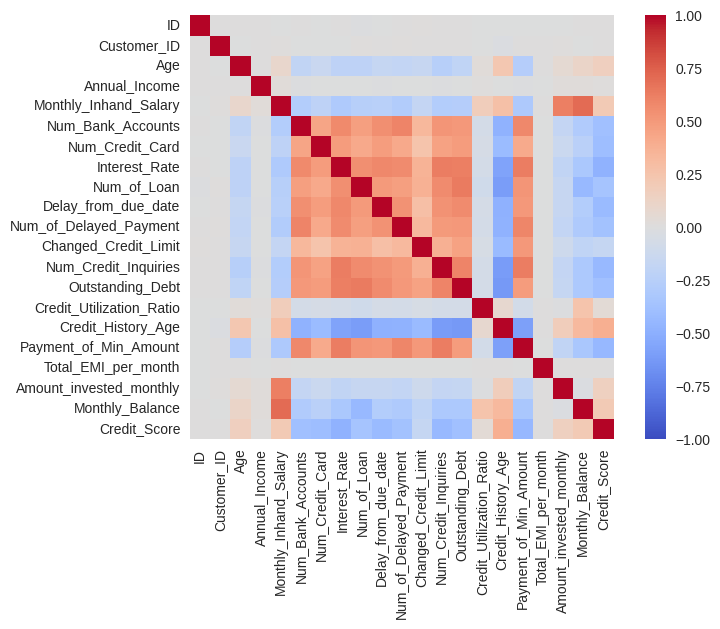

In [39]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

По матрице мы видим, что от месячной зарплаты клиенты очень сильно зависят баланс клиента и его сумма, потраченная на инвестиции. А еще чем старше счет клиента, тем ниже потребность клиента в заведении новых аккаутов. Так же мы видим, что характеристики, такие как процентная ставка, запросы по кредитным картам, количество кредитов и т.п. коррелируют друг с другом, потому что это стандартные банковские характеристики.


## 3. Обработка пропусков.

In [40]:
clean_credit_data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9265
Age                          2577
SSN                          5150
Occupation                   6524
Annual_Income                   0
Monthly_Inhand_Salary       13927
Num_Bank_Accounts              20
Num_Credit_Card                 0
Interest_Rate                1890
Num_of_Loan                  3618
Type_of_Loan                10514
Delay_from_due_date           537
Num_of_Delayed_Payment       6566
Changed_Credit_Limit         1940
Num_Credit_Inquiries         1839
Credit_Mix                  18664
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8381
Payment_of_Min_Amount       11118
Total_EMI_per_month             0
Amount_invested_monthly      8106
Payment_Behaviour            7047
Monthly_Balance              1120
Credit_Score                    0
dtype: int64

Заполним пропущенные значения медианой.

In [41]:
clean_credit_data.fillna(clean_credit_data.median(axis = 0), axis=0 , inplace=True)
clean_credit_data.isna().sum()

<ipython-input-41-b9476c502446>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_credit_data.fillna(clean_credit_data.median(axis = 0), axis=0 , inplace=True)


ID                              0
Customer_ID                     0
Month                           0
Name                         9265
Age                             0
SSN                          5150
Occupation                   6524
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10514
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  18664
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7047
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

Категориальные признаки заполним модой.

In [42]:
clean_credit_data['Name'].fillna(clean_credit_data['Name'].mode().iloc[0], inplace=True)
clean_credit_data['SSN'].fillna(clean_credit_data['SSN'].mode().iloc[0], inplace=True)
clean_credit_data['Occupation'].fillna(clean_credit_data['Occupation'].mode().iloc[0], inplace=True)
clean_credit_data['Type_of_Loan'].fillna(clean_credit_data['Type_of_Loan'].mode().iloc[0], inplace=True)
clean_credit_data['Credit_Mix'].fillna(clean_credit_data['Credit_Mix'].mode().iloc[0], inplace=True)
clean_credit_data['Payment_Behaviour'].fillna(clean_credit_data['Payment_Behaviour'].mode().iloc[0], inplace=True)
clean_credit_data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Теперь численные признаки выглядят следующим образом.

In [43]:
clean_credit_data.describe()

,ID,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,92653.000000,92653.000000,92653.000000,9.265300e+04,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,...,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000,92653.000000
mean,80616.278782,25981.250947,33.299602,1.766188e+05,4027.754392,5.379016,5.532017,14.526243,3.514360,21.200652,...,10.383507,5.750834,1425.390476,32.281487,220.879421,0.645235,1410.215095,189.533521,401.559000,0.886901
std,43297.801732,14338.656852,10.628729,1.431610e+06,2957.099840,2.585684,2.059262,8.702582,2.398899,14.729479,...,6.720529,3.780641,1154.575793,5.118167,95.143036,0.478444,8328.129437,191.145238,212.301467,0.673570
min,5634.000000,1006.000000,14.000000,7.005930e+03,303.645417,0.000000,1.000000,1.000000,0.000000,0.000000,...,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.007760,0.000000
25%,43091.000000,13654.000000,25.000000,1.945305e+04,1792.990833,3.000000,4.000000,8.000000,2.000000,10.000000,...,5.430000,3.000000,565.480000,28.047027,154.000000,0.000000,30.419540,76.980851,270.918433,0.000000
50%,80604.000000,25800.000000,33.000000,3.757861e+04,3093.153333,6.000000,5.000000,13.000000,3.000000,18.000000,...,9.420000,5.000000,1165.700000,32.296084,219.000000,1.000000,69.272824,128.907111,336.756690,1.000000
75%,118116.000000,38388.000000,41.000000,7.279092e+04,5379.470000,7.000000,7.000000,20.000000,5.000000,28.000000,...,14.700000,8.000000,1945.670000,36.499986,292.000000,1.000000,161.163199,219.656201,467.393908,1.000000
max,155629.000000,50999.000000,99.000000,2.419806e+07,15204.633333,10.000000,10.000000,100.000000,9.000000,67.000000,...,36.970000,16.000000,4998.070000,50.000000,404.000000,1.000000,82331.000000,1977.326102,1602.040519,2.000000


А категориальные следующим.

In [44]:
clean_credit_data.describe(include=['category'])

,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_Behaviour
count,92653,92653,92653,92653,92653,92653,92653
unique,8,10137,12499,15,6260,3,6
top,January,Langep,000-86-6182,Lawyer,Not Specified,Standard,Low_spent_Small_value_payments
freq,11643,9307,5158,12619,11824,52726,30600


## 4. Обработка категориальных признаков.

Уберем ненужные для предсказания признаки, такие как "Name", "SNN", "ID", "Customer_ID", "Month", "Type_of_Loan".

In [45]:
cat_credit_data = clean_credit_data
cat_credit_data = cat_credit_data.drop(["Name"], axis=1)
cat_credit_data = cat_credit_data.drop(["SSN"], axis=1)
cat_credit_data = cat_credit_data.drop(["ID"], axis=1)
cat_credit_data = cat_credit_data.drop(["Customer_ID"], axis=1)
cat_credit_data = cat_credit_data.drop(["Month"], axis=1)
cat_credit_data = cat_credit_data.drop(["Type_of_Loan"], axis=1)

cat_credit_data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4,3.0,4.0,3.0,7.0,...,Standard,809.98,26.822620,265.0,0.0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,23.0,Scientist,19114.12,3093.153333,3.0,4,3.0,4.0,18.0,14.0,...,Good,809.98,31.944960,219.0,0.0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,33.0,Scientist,19114.12,3093.153333,3.0,4,3.0,4.0,3.0,7.0,...,Good,809.98,28.609352,267.0,0.0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,23.0,Scientist,19114.12,3093.153333,3.0,4,3.0,4.0,5.0,4.0,...,Good,809.98,31.377862,268.0,0.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,23.0,Scientist,19114.12,1824.843333,3.0,4,3.0,4.0,6.0,14.0,...,Good,809.98,24.797347,269.0,0.0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [46]:
cat_credit_data['Payment_of_Min_Amount'] = pd.factorize(cat_credit_data['Payment_of_Min_Amount'])[0]

Occupation_dummies = pd.get_dummies(cat_credit_data['Occupation'])
Credit_Mix_dummies = pd.get_dummies(cat_credit_data['Credit_Mix'])
Payment_Behaviour_dummies = pd.get_dummies(cat_credit_data['Payment_Behaviour'])
cat_credit_data = pd.concat((cat_credit_data, Occupation_dummies), axis=1)
cat_credit_data = pd.concat((cat_credit_data, Credit_Mix_dummies), axis=1)
cat_credit_data = pd.concat((cat_credit_data, Payment_Behaviour_dummies), axis=1)
cat_credit_data = cat_credit_data.drop(['Occupation'], axis=1)
cat_credit_data = cat_credit_data.drop(['Credit_Mix'], axis=1)
cat_credit_data = cat_credit_data.drop(['Payment_Behaviour'], axis=1)

cat_credit_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Writer,Bad,Good,Standard,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4,3.0,4.0,3.0,7.0,11.27,...,0,0,0,1,0,0,1,0,0,0
1,23.0,19114.12,3093.153333,3.0,4,3.0,4.0,18.0,14.0,11.27,...,0,0,1,0,0,0,0,1,0,0
2,33.0,19114.12,3093.153333,3.0,4,3.0,4.0,3.0,7.0,9.42,...,0,0,1,0,0,0,0,0,1,0
3,23.0,19114.12,3093.153333,3.0,4,3.0,4.0,5.0,4.0,6.27,...,0,0,1,0,0,0,0,0,0,1
4,23.0,19114.12,1824.843333,3.0,4,3.0,4.0,6.0,14.0,11.27,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6,7.0,2.0,23.0,7.0,11.50,...,0,0,0,1,1,0,0,0,0,0
99996,25.0,39628.99,3359.415833,4.0,6,7.0,2.0,18.0,7.0,11.50,...,0,0,0,1,0,1,0,0,0,0
99997,25.0,39628.99,3359.415833,4.0,6,13.0,2.0,27.0,6.0,11.50,...,0,0,1,0,1,0,0,0,0,0
99998,25.0,39628.99,3359.415833,4.0,6,7.0,2.0,20.0,14.0,11.50,...,0,0,1,0,0,0,0,1,0,0


## 5. Нормализация.
Проведем стандартизацию признаков, чтобы в дальнейшем воспользоваться методом k-ближайших соседей.

In [47]:
credit_data_stand = (cat_credit_data - cat_credit_data.mean(axis = 0))/cat_credit_data.std(axis = 0)

credit_data_stand.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Writer,Bad,Good,Standard,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,-0.969034,-0.110019,-0.744957,-0.920072,-0.743964,-1.324462,0.202443,-1.235662,-1.076307,0.131908,...,-0.250579,-0.483945,-0.563749,0.870199,-0.398404,-0.461643,2.789509,-0.341225,-0.401635,-0.702226
1,-0.969034,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-0.217296,0.096665,0.131908,...,-0.250579,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,2.930587,-0.401635,-0.702226
2,-0.028188,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-1.235662,-1.076307,-0.143368,...,-0.250579,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,-0.341225,2.489795,-0.702226
3,-0.969034,-0.110019,-0.316053,-0.920072,-0.743964,-1.324462,0.202443,-1.099880,-1.579009,-0.612081,...,-0.250579,-0.483945,1.773821,-1.149150,-0.398404,-0.461643,-0.358482,-0.341225,-0.401635,1.424027
4,-0.969034,-0.110019,-0.744957,-0.920072,-0.743964,-1.324462,0.202443,-1.031988,0.096665,0.131908,...,-0.250579,-0.483945,1.773821,-1.149150,-0.398404,2.166152,-0.358482,-0.341225,-0.401635,-0.702226


## 6. Разбиение данных на обучающую и тестовую выборки.

In [48]:
X = credit_data_stand.drop(["Credit_Score"], axis=1)
y = cat_credit_data["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((69489, 42), (23164, 42))

In [49]:
y.value_counts()

1    49432
0    26850
2    16371
Name: Credit_Score, dtype: int64

In [50]:
classes = [0, 1, 2]

## 7. Использование классификатора k-ближайших соседей.

Возьмем стандартное значение - 5 соседей.

In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train.values, y_train.values)
y_train_predict = knn.predict(X_train.values)
y_test_predict = knn.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 76.62%, Test: 65.86%
MSE: Train 0.29, Test 0.44


Построим матрицу рассогласования.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


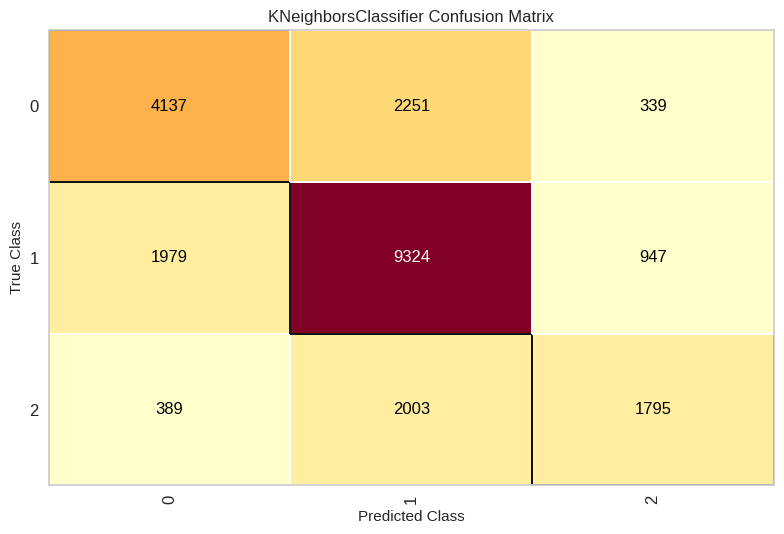

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6ac86a7400>,
                estimator=KNeighborsClassifier())

In [52]:
confusion_matrix(knn, X_train, y_train, X_test, y_test, classes=classes)

Построим диаграмму, чтобы увидеть ошибку наглядно.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


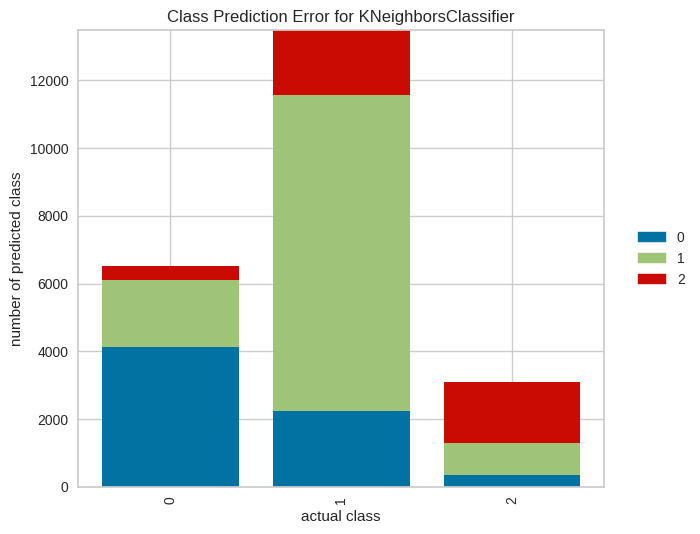

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2], estimator=KNeighborsClassifier())

In [53]:
class_prediction_error(knn, X_train, y_train, X_test, y_test, classes=classes)

По матрице мы видим, что кредитный рейтинг "1" предсказывается некачественно.

Рассмотрим 7 соседей.

In [54]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train.values, y_train.values)
y_train_predict = knn_7.predict(X_train.values)
y_test_predict = knn_7.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 74.55%, Test: 66.46%
MSE: Train 0.32, Test 0.42


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


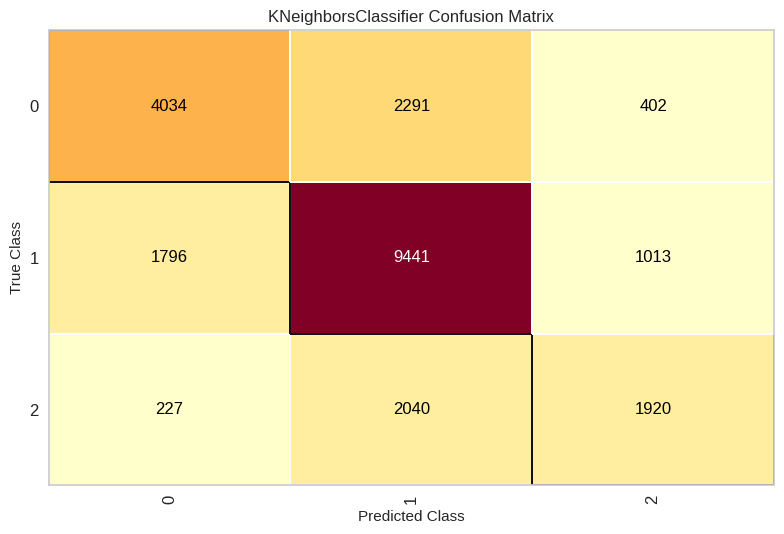

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6ac93dba90>,
                estimator=KNeighborsClassifier(n_neighbors=7))

In [55]:
confusion_matrix(knn_7, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


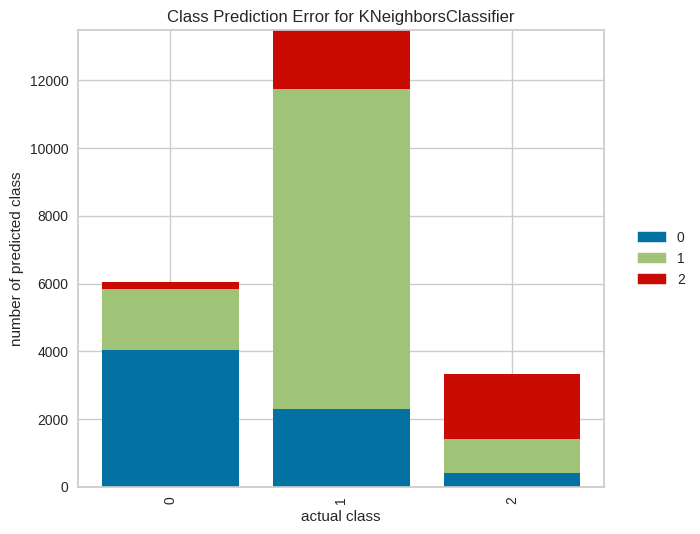

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2],
                     estimator=KNeighborsClassifier(n_neighbors=7))

In [56]:
class_prediction_error(knn_7, X_train, y_train, X_test, y_test, classes=classes)

Возьмем 15 соседей.

In [57]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train.values, y_train.values)
y_train_predict = knn_15.predict(X_train.values)
y_test_predict = knn_15.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 71.08%, Test: 66.17%
MSE: Train 0.36, Test 0.42


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


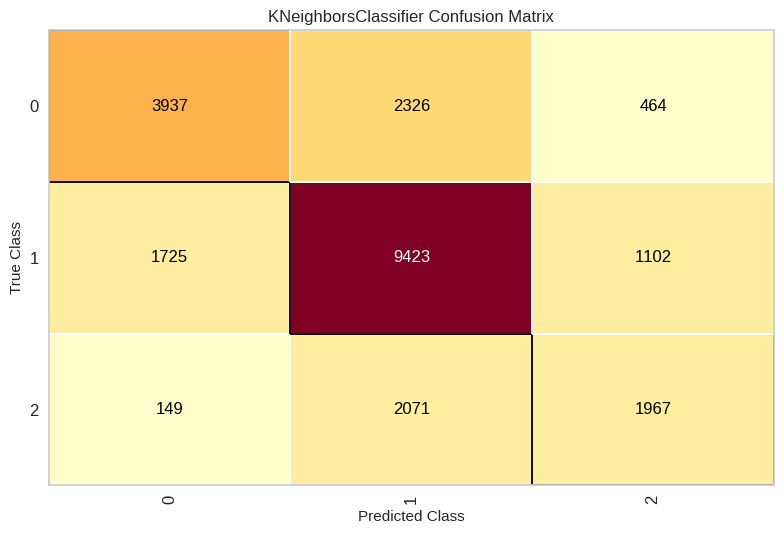

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6ac871f5e0>,
                estimator=KNeighborsClassifier(n_neighbors=15))

In [58]:
confusion_matrix(knn_15, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


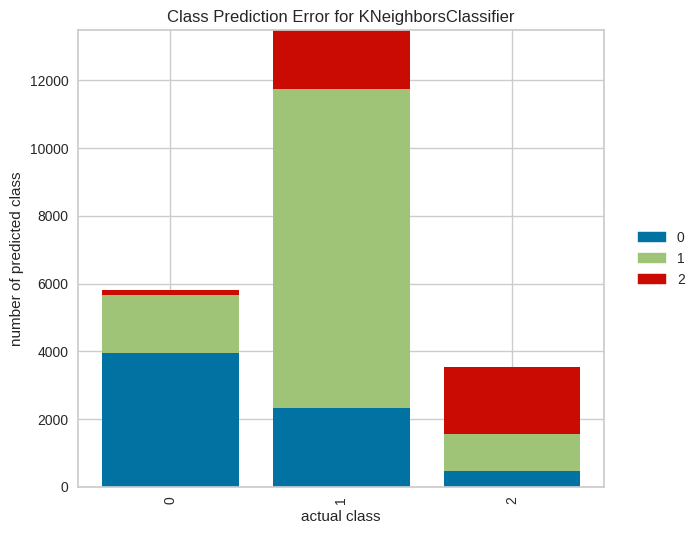

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2],
                     estimator=KNeighborsClassifier(n_neighbors=15))

In [59]:
class_prediction_error(knn_15, X_train, y_train, X_test, y_test, classes=classes)

Точность снизилась с увеличением количества соседей, поэтому возьмем 3 соседа.

In [60]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train.values, y_train.values)
y_train_predict = knn_3.predict(X_train.values)
y_test_predict = knn_3.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 81.05%, Test: 64.65%
MSE: Train 0.26, Test 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


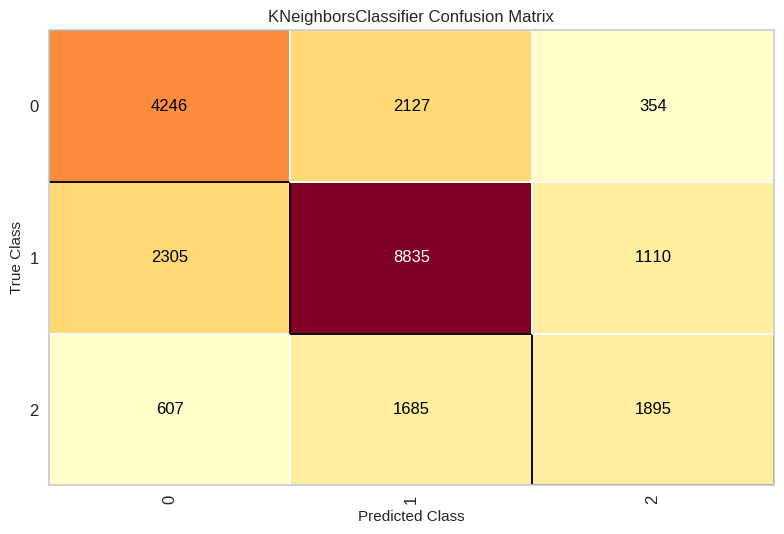

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6aca402b60>,
                estimator=KNeighborsClassifier(n_neighbors=3))

In [61]:
confusion_matrix(knn_3, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


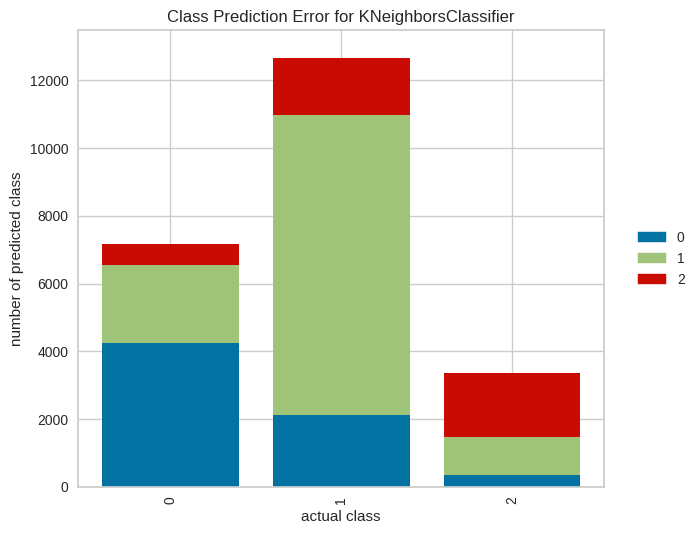

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2],
                     estimator=KNeighborsClassifier(n_neighbors=3))

In [62]:
class_prediction_error(knn_3, X_train, y_train, X_test, y_test, classes=classes)

Попробуем посмотреть 2 соседей.

In [63]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train.values, y_train.values)
y_train_predict = knn_2.predict(X_train.values)
y_test_predict = knn_2.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 81.78%, Test: 62.52%
MSE: Train 0.23, Test 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


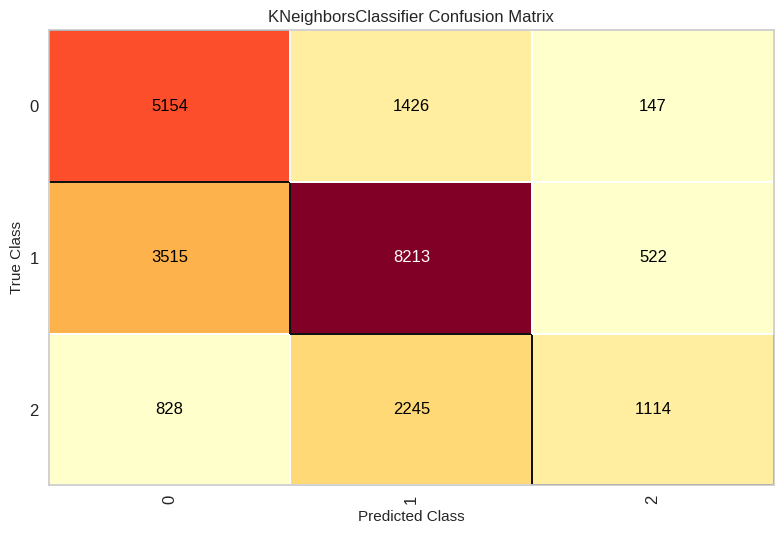

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6aca401f00>,
                estimator=KNeighborsClassifier(n_neighbors=2))

In [64]:
confusion_matrix(knn_2, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


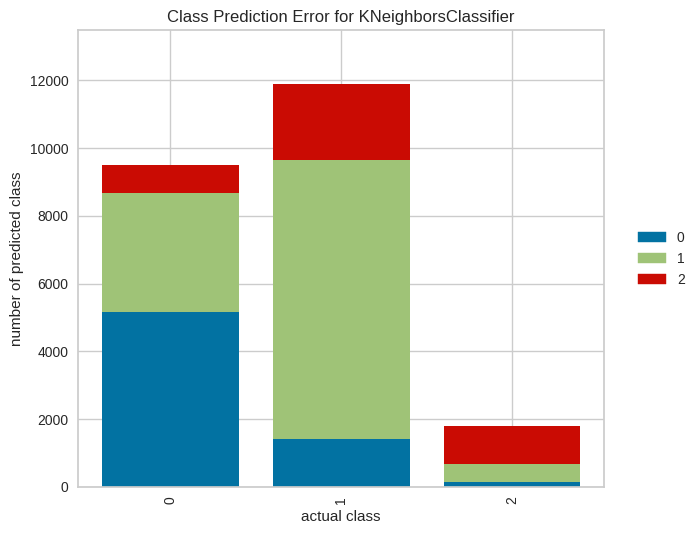

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2],
                     estimator=KNeighborsClassifier(n_neighbors=2))

In [65]:
class_prediction_error(knn_2, X_train, y_train, X_test, y_test, classes=classes)

По данной матрице можно сказать, что класс "1" теперь предсказывается лучше, но "0" хуже.

По данным ошибок можно сделать следующие выводы: лучше всего себя показал метод 2х соседей на обучающей выборке и при 7ми соседях. Таким образом, будем считать, что лучше всего себя показал метод при 6ти соседях, так он дал минимальную ошибку на тестовой выборке. Хуже всего себя показал метод при 15ти соседях на обучающей выборке и при 2х на тестовой. По матрице ошибок можно сказать, что большинство клиентов банка имеет рейтинг "1".

## 8. Логистическая регрессия.

Возьмем 500 итераций.

In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=500)
LR.fit(X_train, y_train)

LR_training_predict = LR.score(X_train, y_train)
LR_test_predict = LR.score(X_test, y_test)

err_train = np.mean(y_train != LR.predict(X_train))
err_test  = np.mean(y_test  != LR.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(LR_training_predict, LR_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.65, Test: 0.64. 
Error. Train : 0.35, Test: 0.36. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


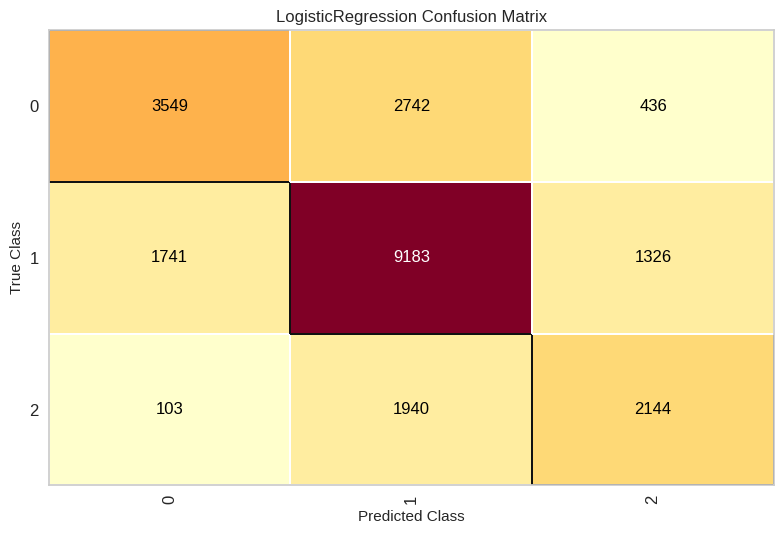

ConfusionMatrix(ax=<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6aca2c3790>,
                estimator=LogisticRegression(max_iter=500))

In [67]:
confusion_matrix(LR, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


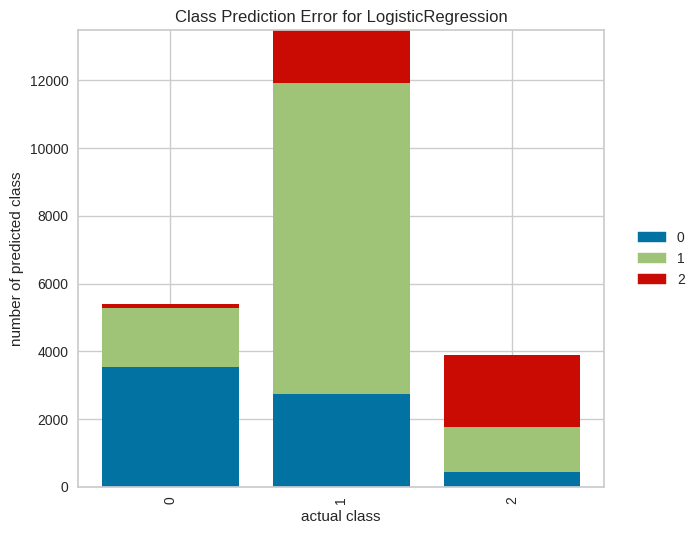

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2],
                     estimator=LogisticRegression(max_iter=500))

In [68]:
class_prediction_error(LR, X_train, y_train, X_test, y_test, classes=classes)

## 9. Random Forest.

Возьмем глубину, равную 4.

In [69]:
from sklearn.ensemble import RandomForestClassifier
RanForest = RandomForestClassifier(n_estimators = 100, max_depth = 4)
RanForest.fit(X_train, y_train)

RanForest_training_predict = RanForest.score(X_train, y_train)
RanForest_test_predict = RanForest.score(X_test, y_test)

err_train = np.mean(y_train != RanForest.predict(X_train))
err_test  = np.mean(y_test  != RanForest.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(RanForest_training_predict, RanForest_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.65, Test: 0.64. 
Error. Train : 0.35, Test: 0.36. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


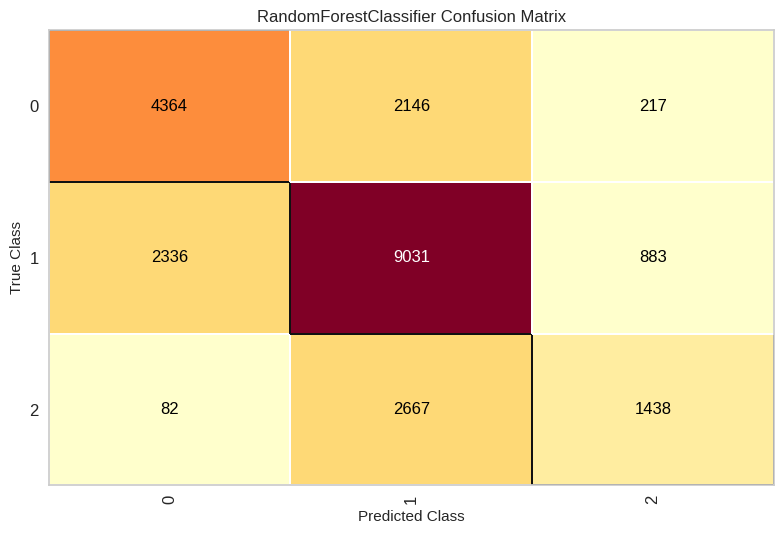

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6aca1967a0>,
                estimator=RandomForestClassifier(max_depth=4))

In [70]:
confusion_matrix(RanForest, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


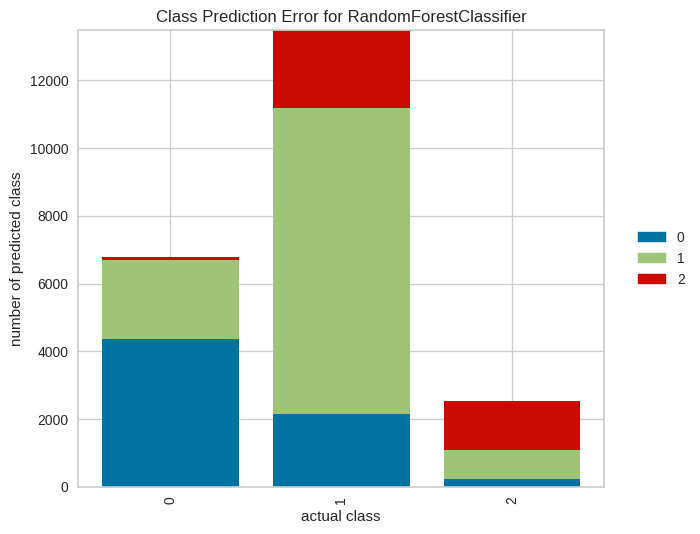

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2],
                     estimator=RandomForestClassifier(max_depth=4))

In [71]:
class_prediction_error(RanForest, X_train, y_train, X_test, y_test, classes=classes)

Изменим максимальную глубину max_depth с 4 до 15.

In [72]:
RanForest = RandomForestClassifier(n_estimators = 100, max_depth = 15)
RanForest.fit(X_train, y_train)

RanForest_training_predict = RanForest.score(X_train, y_train)
RanForest_test_predict = RanForest.score(X_test, y_test)

err_train = np.mean(y_train != RanForest.predict(X_train))
err_test  = np.mean(y_test  != RanForest.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(RanForest_training_predict, RanForest_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.84, Test: 0.74. 
Error. Train : 0.16, Test: 0.26. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


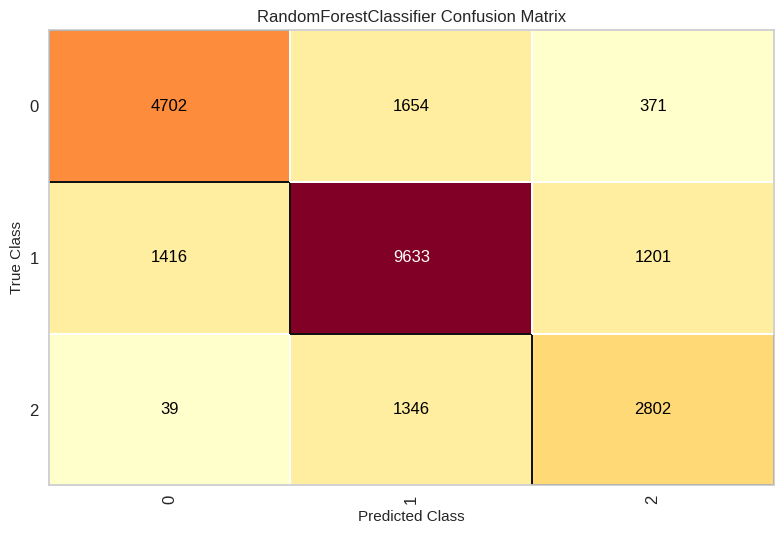

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6acae86da0>,
                estimator=RandomForestClassifier(max_depth=15))

In [73]:
confusion_matrix(RanForest, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


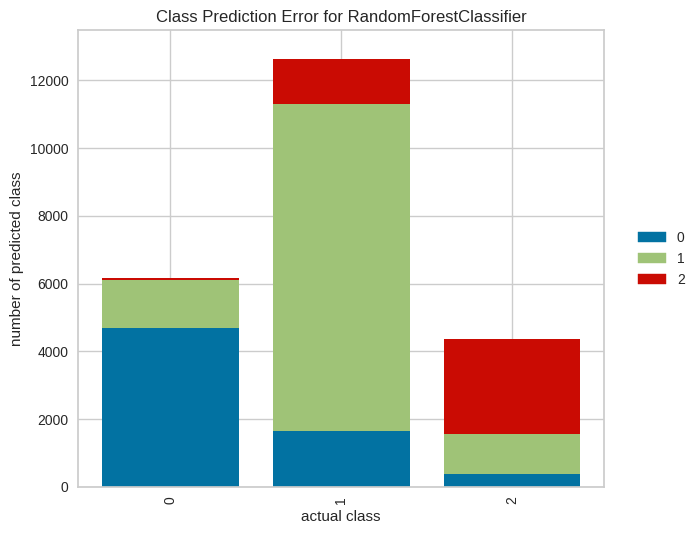

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2],
                     estimator=RandomForestClassifier(max_depth=15))

In [74]:
class_prediction_error(RanForest, X_train, y_train, X_test, y_test, classes=classes)

Точность при увеличении max_depth возросла.

## 10. GradientBoosting.

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100)
GB.fit(X_train, y_train)

GB_training_predict = GB.score(X_train, y_train)
GB_test_predict = GB.score(X_test, y_test)

err_train = np.mean(y_train != GB.predict(X_train))
err_test  = np.mean(y_test  != GB.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(GB_training_predict, GB_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.71, Test: 0.70. 
Error. Train : 0.29, Test: 0.30. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


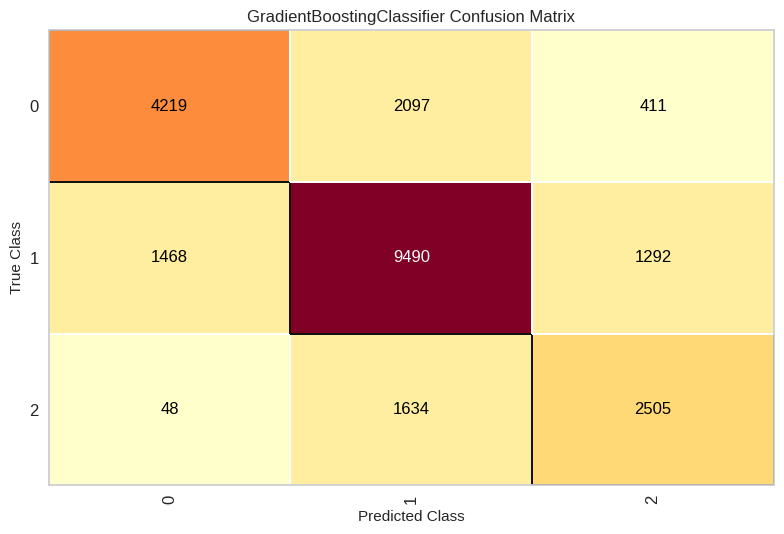

ConfusionMatrix(ax=<Axes: title={'center': 'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6ac9307310>,
                estimator=GradientBoostingClassifier())

In [76]:
confusion_matrix(GB, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


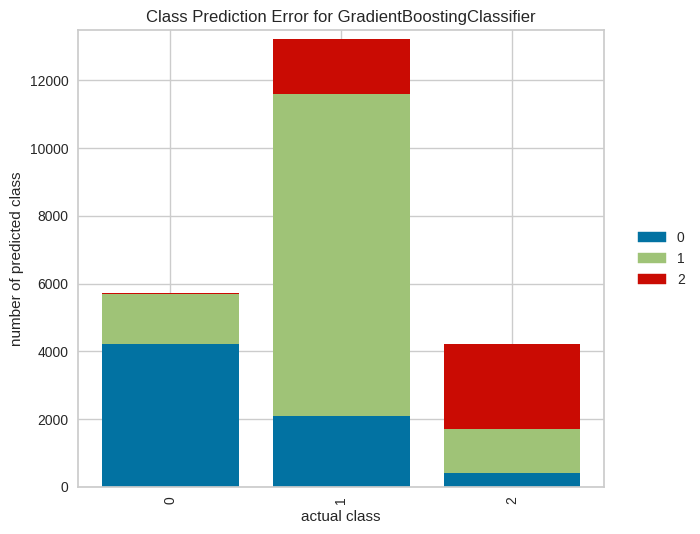

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2], estimator=GradientBoostingClassifier())

In [77]:
class_prediction_error(GB, X_train, y_train, X_test, y_test, classes=classes)

## 11. Неглубокая нейронная сеть.

Возьмем однослойную сеть.

In [78]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000)
NN.fit(X_train, y_train)

NN_training_predict = NN.score(X_train, y_train)
NN_test_predict = NN.score(X_test, y_test)

err_train = np.mean(y_train != NN.predict(X_train))
err_test  = np.mean(y_test  != NN.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(NN_training_predict, NN_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.72, Test: 0.70. 
Error. Train : 0.28, Test: 0.30. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


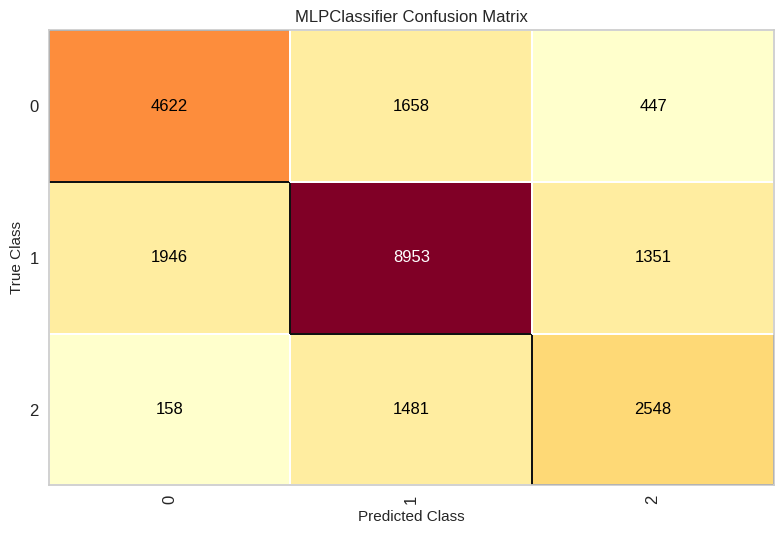

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1, 2],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e6ac86a7790>,
                estimator=MLPClassifier(hidden_layer_sizes=50, max_iter=1000))

In [79]:
confusion_matrix(NN, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


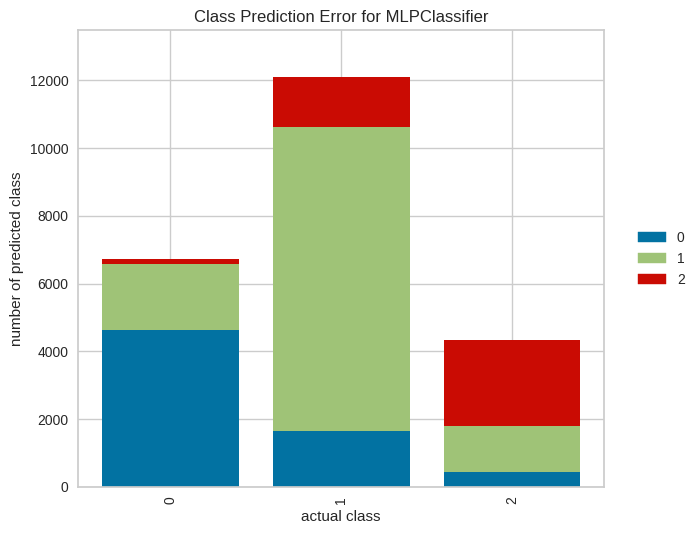

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1, 2],
                     estimator=MLPClassifier(hidden_layer_sizes=50,
                                             max_iter=1000))

In [80]:
class_prediction_error(NN, X_train, y_train, X_test, y_test, classes=classes)

Построим графики зависимости ошибки от гиперпараметров.

Рассмотрим зависимость ошибки от числа нейронов в скрытом слое.

In [76]:
array_neurons = np.arange(1, 50, 1)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons in array_neurons:
    mlp_model = MLPClassifier(hidden_layer_sizes=(neurons), max_iter=1000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

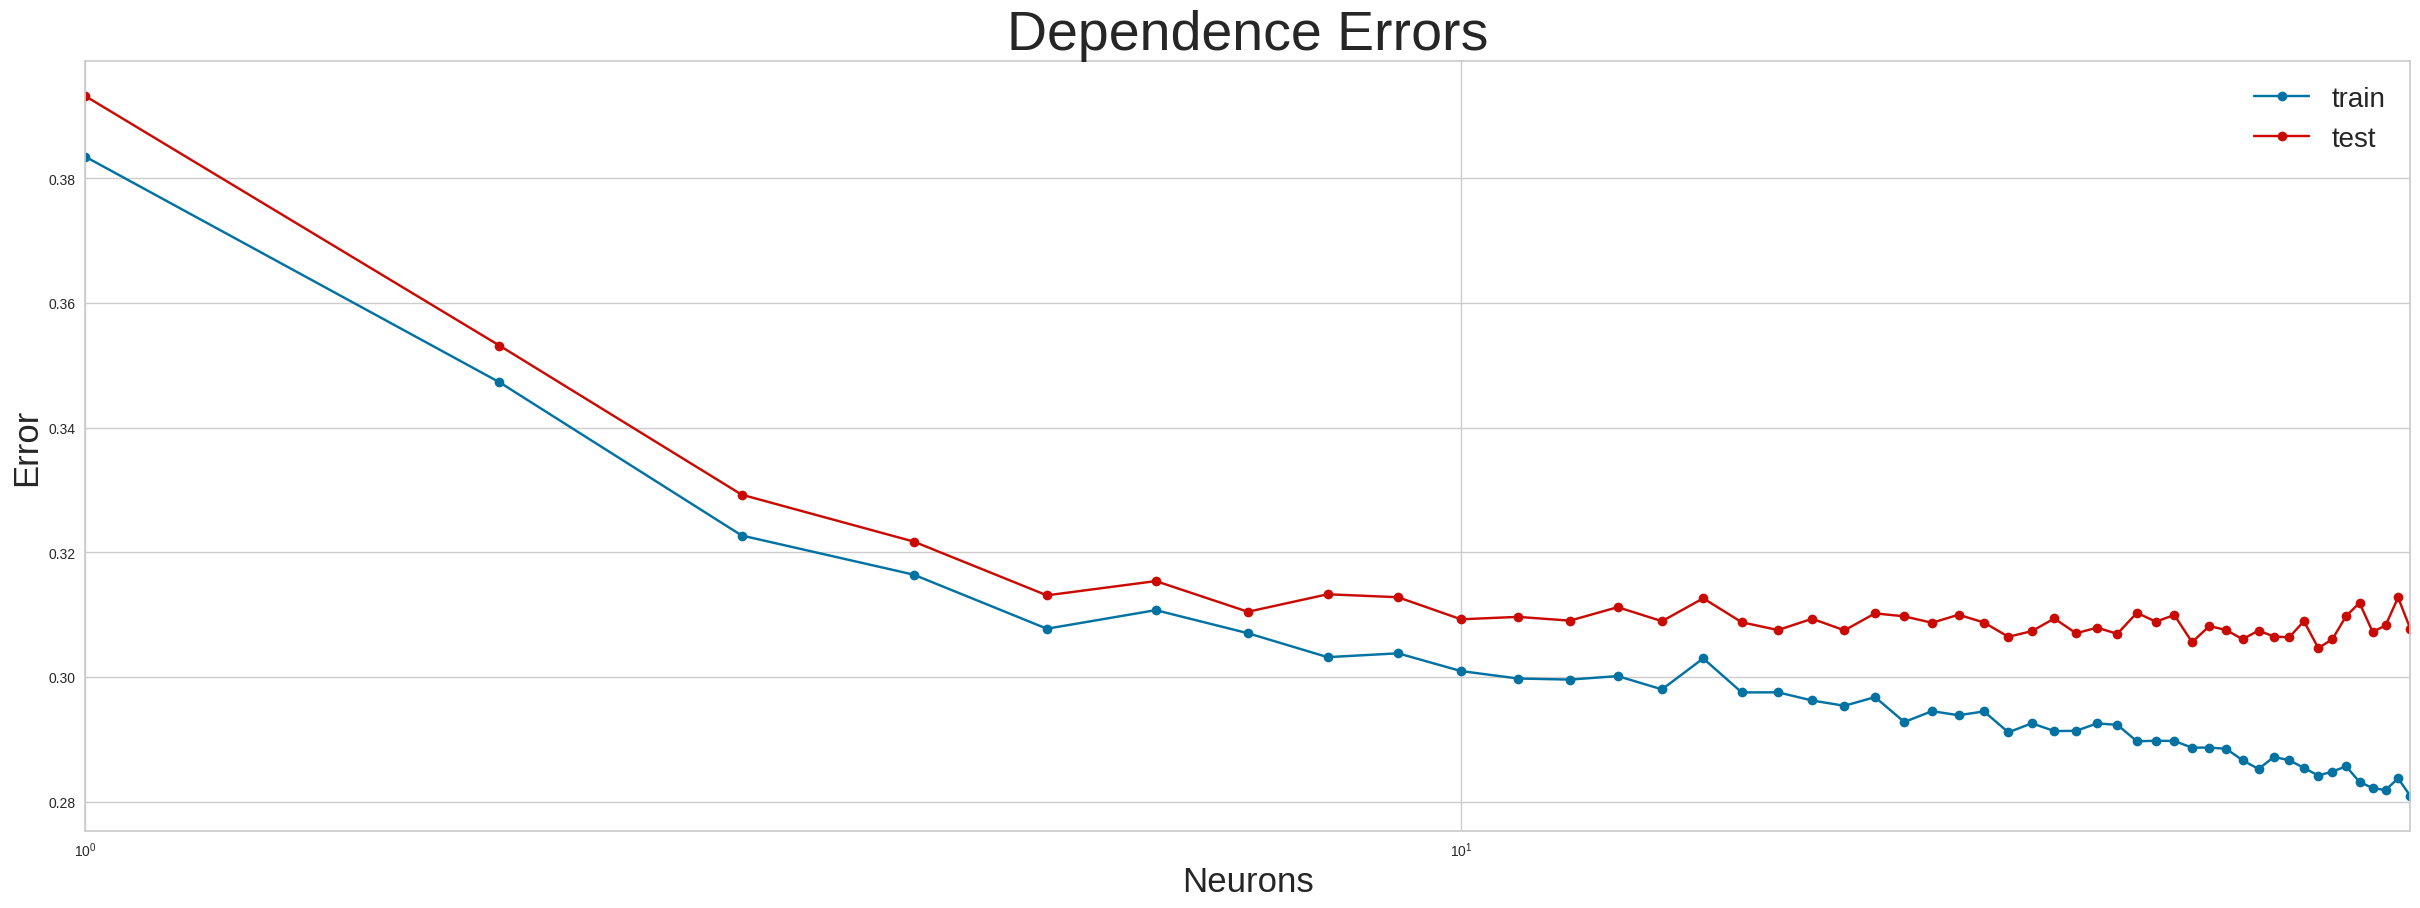

In [77]:
plt.figure(figsize = (30, 10))

plt.semilogx(array_neurons, train_err, 'b-o', label = 'train')
plt.semilogx(array_neurons, test_err, 'r-o', label = 'test')

plt.xlim([np.min(array_neurons), np.max(array_neurons)])

plt.title('Dependence Errors', fontsize = 40)
plt.xlabel('Neurons', fontsize = 25)
plt.ylabel('Error', fontsize = 25)

plt.legend(fontsize = 20)

Данный график показывает, что у нас есть некоторое переобучение, потому как ошибка на тестовых данных начинает увеличиваться на некотором шаге.

Рассмотрим зависимость величины ошибки от параметра $\alpha$.

In [81]:
range_alpha = np.linspace(0.0001, 0.001, 50)
layers = (50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alphalc in range_alpha:
  NN = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000, alpha = alphalc)
  NN.fit(X_train, y_train)
  y_train_pred = NN.predict(X_train)
  y_test_pred = NN.predict(X_test)

  train_err.append(np.mean(y_train != y_train_pred))
  test_err.append(np.mean(y_test != y_test_pred))

  train_acc.append(accuracy_score(y_train, y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))


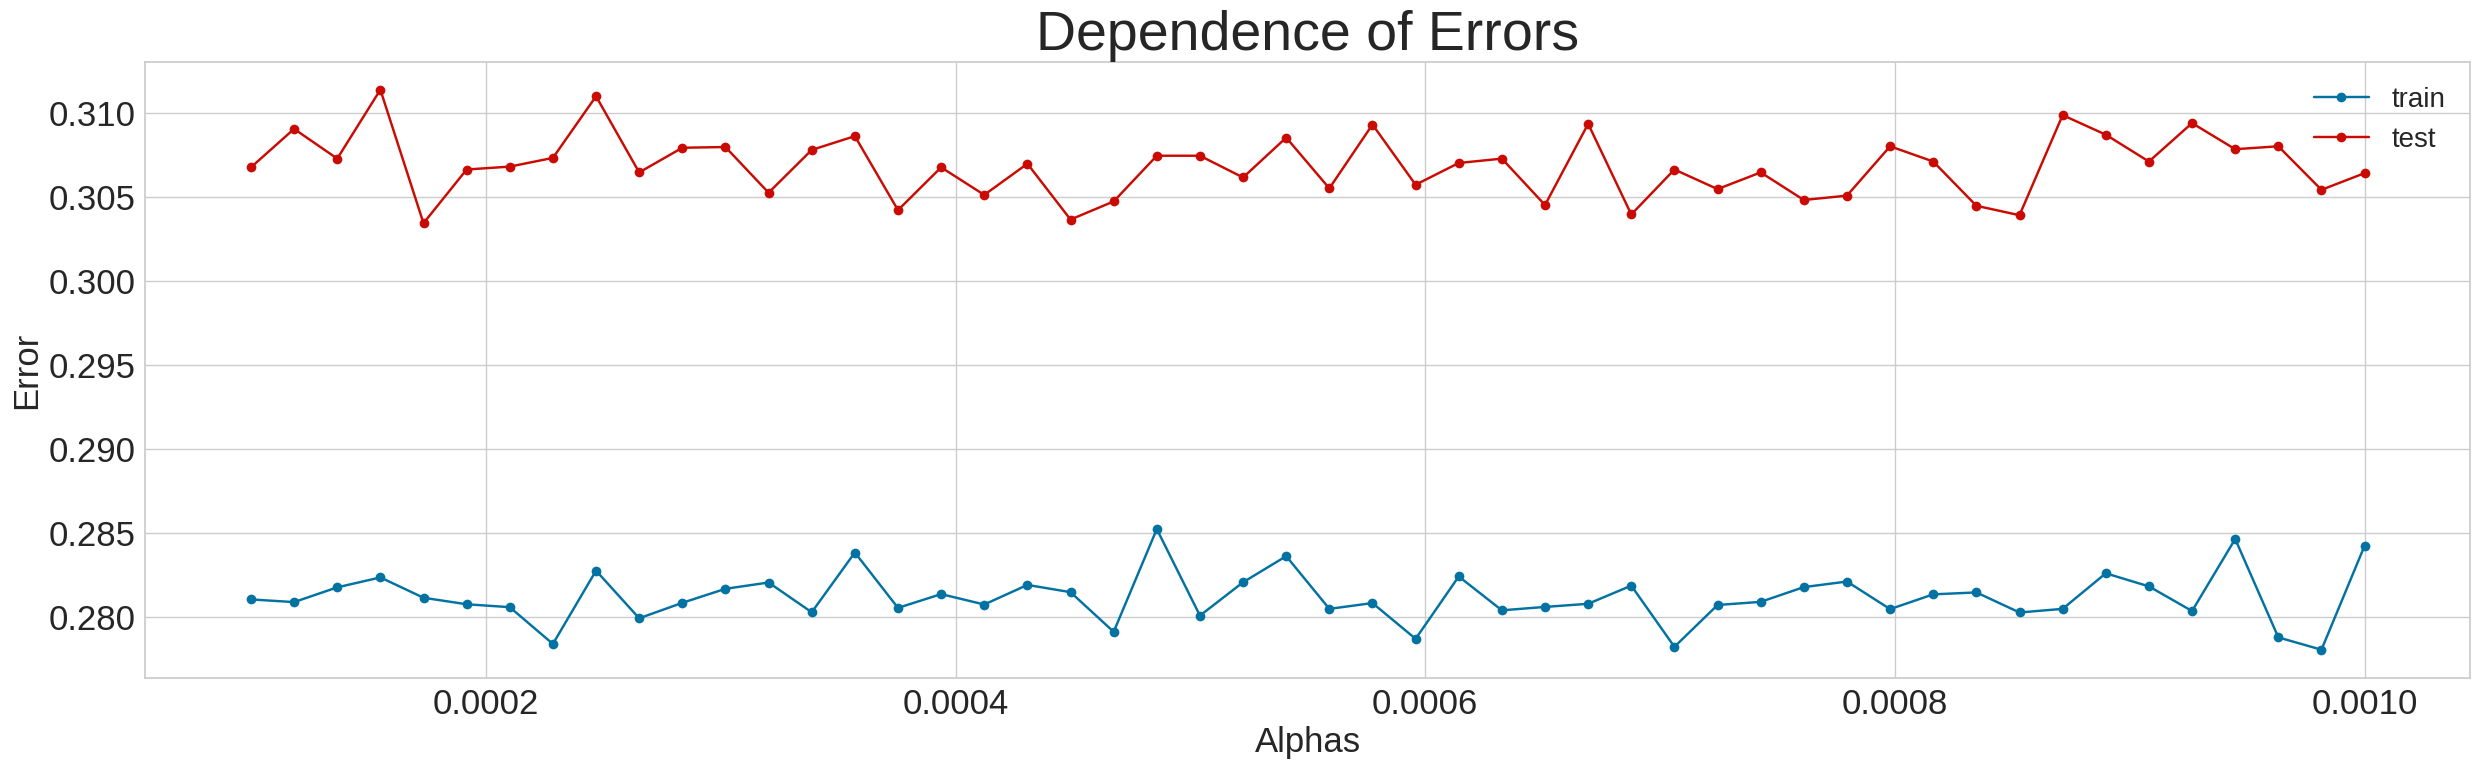

In [82]:
plt.figure(figsize = (30, 8))

plt.plot(range_alpha, train_err, 'b-o', label = 'train')
plt.plot(range_alpha, test_err, 'r-o', label = 'test')

plt.title('Dependence of Errors', fontsize = 40)
plt.xlabel('Alphas', fontsize = 25)
plt.ylabel('Error', fontsize = 25)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.tick_params(axis='both', which='minor', labelsize=25)

plt.legend(fontsize = 20)

Наилучший результат мы видим в самом начале обучения.

## 12. Выводы.
В результате данной работы были рассмотрены такие методы анализа данных, как  логистическая регрессия, RandomForest, Gradient Boost, а также полносвязная однослойная нейронная сеть. Были построены матрицы рассогласования, которые показывают, где ошибается нейронная сеть. Большая часть ошибок приходится на класс "1". Для одной нейронной сети подбирались различные наборы гиперпараметров, по ним были построены построить графики зависимости ошибки от них: зависимость величины ошибки обучения от параметра alpha и от количества нейронов. В одном случае мы наблюдали переобучение. Лучшим методом предсказания по процентному соотношению ошибок оказался Random Forest, это связано с тем, что точность предсказания для класса "1" у данного метода выше, чем у остальных, также количество клиентов класса "1" в выборке больше, чем других. Данный результат объясняется несбалансированностью классов.